In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import mne
import xarray as xr
import matplotlib.pyplot as plt
from scipy import signal
import ghibtools as gh
import pandas as pd
import seaborn as sns
import pingouin as pg
import neurokit2 as nk
from params import *
from bibliotheque import *
import physio
import time
from compute_phase_freq import baseline_power_job, phase_freq_job
from preproc import convert_vhdr_job, eeg_interp_artifact_job
from compute_power_at_resp import power_at_resp_job
from compute_phase_freq import phase_freq_job
from compute_global_dataframes import hrv_concat_job

# RESPI POUR ANASTAZJA

In [3]:
run_key = 'P10_baseline'

In [4]:
raw_dataset = convert_vhdr_job.get(run_key)
resp_raw = raw_dataset['raw'].sel(chan='RespiNasale', time = slice(0, session_duration)).values[:-1]

resp_raw = -resp_raw
srate = raw_dataset['raw'].attrs['srate']
resp, resp_cycles = physio.compute_respiration(resp_raw, srate, parameter_preset='human_airflow')

t = np.arange(0, resp.size / srate, 1 / srate)

In [5]:
%matplotlib inline

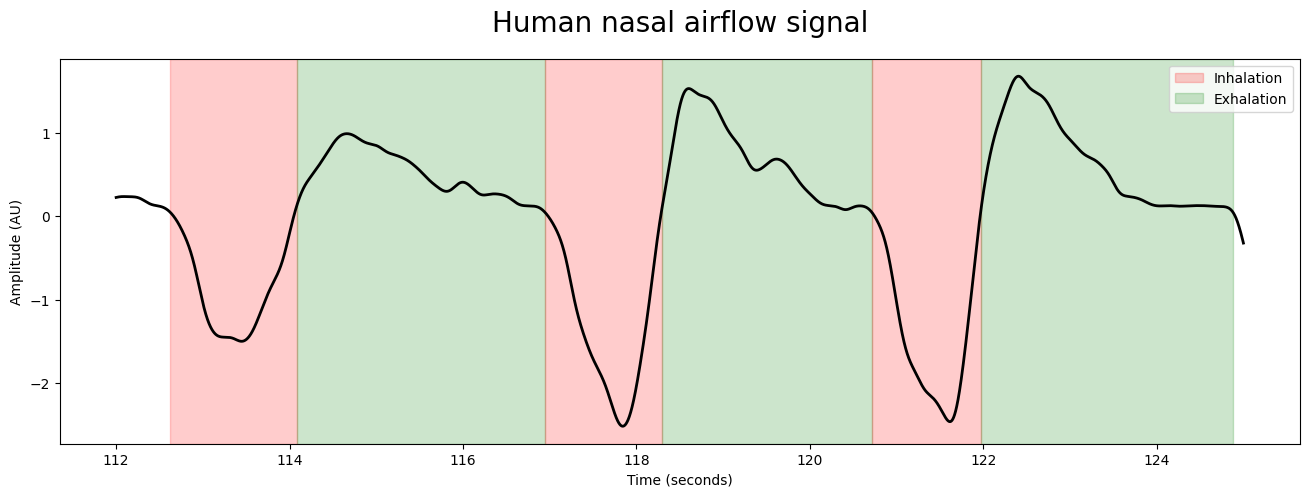

In [6]:
start, stop = 112 , 125

mask_t = (t >= start) & (t < stop)

resp_cycles_win = resp_cycles[(resp_cycles['inspi_time'] >= start) & (resp_cycles['next_inspi_time'] < stop)]

t_plot = t[mask_t]
resp_plot = resp[mask_t]
resp_plot = (resp_plot - np.mean(resp_plot)) / np.std(resp_plot)

fig ,ax = plt.subplots(figsize = (16,5))
ax.plot(t_plot, resp_plot, lw = 2, color = 'k')

for c, row in resp_cycles_win.iterrows():   
    ax.axvspan(xmin = row['inspi_time'], xmax = row['expi_time'], label = 'Inhalation', color = 'r', alpha = 0.2)
    ax.axvspan(xmin = row['expi_time'], xmax = row['next_inspi_time'], label = 'Exhalation', color = 'g', alpha = 0.2)
    if c == resp_cycles_win.index[0]: 
        ax.legend()
        
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude (AU)')

ax.set_title('Human nasal airflow signal', fontsize = 20, y = 1.05)

fig.savefig(base_folder / 'Figures' / 'Autres' / 'pour_anastazja.png', dpi = 300, bbox_inches = 'tight')

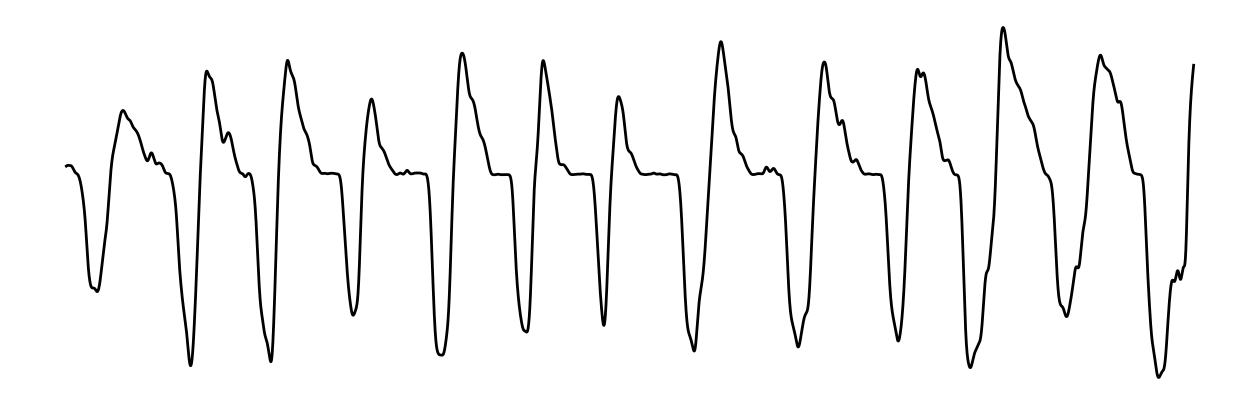

In [11]:
start, stop = 112 , 165

mask_t = (t >= start) & (t < stop)

resp_cycles_win = resp_cycles[(resp_cycles['inspi_time'] >= start) & (resp_cycles['next_inspi_time'] < stop)]

t_plot = t[mask_t]
resp_plot = resp[mask_t]
resp_plot = (resp_plot - np.mean(resp_plot)) / np.std(resp_plot)

fig ,ax = plt.subplots(figsize = (16,5))
ax.plot(t_plot, resp_plot, lw = 2, color = 'k')

plt.axis(False)



fig.savefig(base_folder / 'Figures' / 'Autres' / 'pour_anastazja_bis.png', dpi = 300, bbox_inches = 'tight')

# phase_freq